### plot traces for normal and 6ohda models for visual inspection

In [1]:
!pip install pynwb

In [17]:
import matplotlib.pyplot as plt
import sim.nwbio as nwbio
import preprocessing
import numpy as np

In [3]:
f = nwbio.FileReader('test_0.nwb')

In [64]:
def get_cellid(x):
    # extract the cellid from the key
    return int(x.replace('output-', '').split('-')[0].replace('cellid=', ''))


# dissect in normal and parkinsonian models
normal_keys = { get_cellid(x):x for x in f.nwbfile.acquisition.keys() if '6ohda' not in x }
parkinsonian_keys = { get_cellid(x):x for x in f.nwbfile.acquisition.keys() if '6ohda' in x }

In [65]:
normal_keys

{0: 'output-cellid=0-seed=0-tstop=15s.somatic.0(0.500000)._ref_v',
 1: 'output-cellid=1-seed=0-tstop=15s.somatic.0(0.500000)._ref_v',
 10: 'output-cellid=10-seed=0-tstop=15s.somatic.0(0.500000)._ref_v',
 11: 'output-cellid=11-seed=0-tstop=15s.somatic.0(0.500000)._ref_v',
 12: 'output-cellid=12-seed=0-tstop=15s.somatic.0(0.500000)._ref_v',
 13: 'output-cellid=13-seed=0-tstop=15s.somatic.0(0.500000)._ref_v',
 14: 'output-cellid=14-seed=0-tstop=15s.somatic.0(0.500000)._ref_v',
 15: 'output-cellid=15-seed=0-tstop=15s.somatic.0(0.500000)._ref_v',
 16: 'output-cellid=16-seed=0-tstop=15s.somatic.0(0.500000)._ref_v',
 17: 'output-cellid=17-seed=0-tstop=15s.somatic.0(0.500000)._ref_v',
 18: 'output-cellid=18-seed=0-tstop=15s.somatic.0(0.500000)._ref_v',
 19: 'output-cellid=19-seed=0-tstop=15s.somatic.0(0.500000)._ref_v',
 2: 'output-cellid=2-seed=0-tstop=15s.somatic.0(0.500000)._ref_v',
 20: 'output-cellid=20-seed=0-tstop=15s.somatic.0(0.500000)._ref_v',
 21: 'output-cellid=21-seed=0-tstop=15s.

In [66]:
def plot_traces(keys, selection=[], ncol=4):
    # number of rows needed to print all the traces
    nrow = int(len(keys) / ncol) + 1

    # print normal models
    fig = plt.figure(figsize=(15, nrow * 15 / ncol))

    for i, (cellid, k) in enumerate(sorted(keys.items())):        
        plt.subplot(nrow, ncol, i + 1)
        
        trace = f.read(k)
        
        cnt = preprocessing.get_spike_count(*trace, tinit=5000, tend=15000, threshold=-20) / 10.0
        
        plt.title('cellid=%d-APcount=%d' % (cellid, cnt))
        
        plt.plot(*trace, color=('red' if cellid in selection else 'blue'))
        plt.plot([0, 15000], [-15, -15], color='orange')
        
        vmean = np.mean(trace[1][trace[0] >= 5000.0])
        plt.plot([0, 15000], [vmean, vmean], linewidth=3, color='green')
        plt.xlim([5000, 15000])

    plt.tight_layout(pad=2)
    plt.show()

## normal models

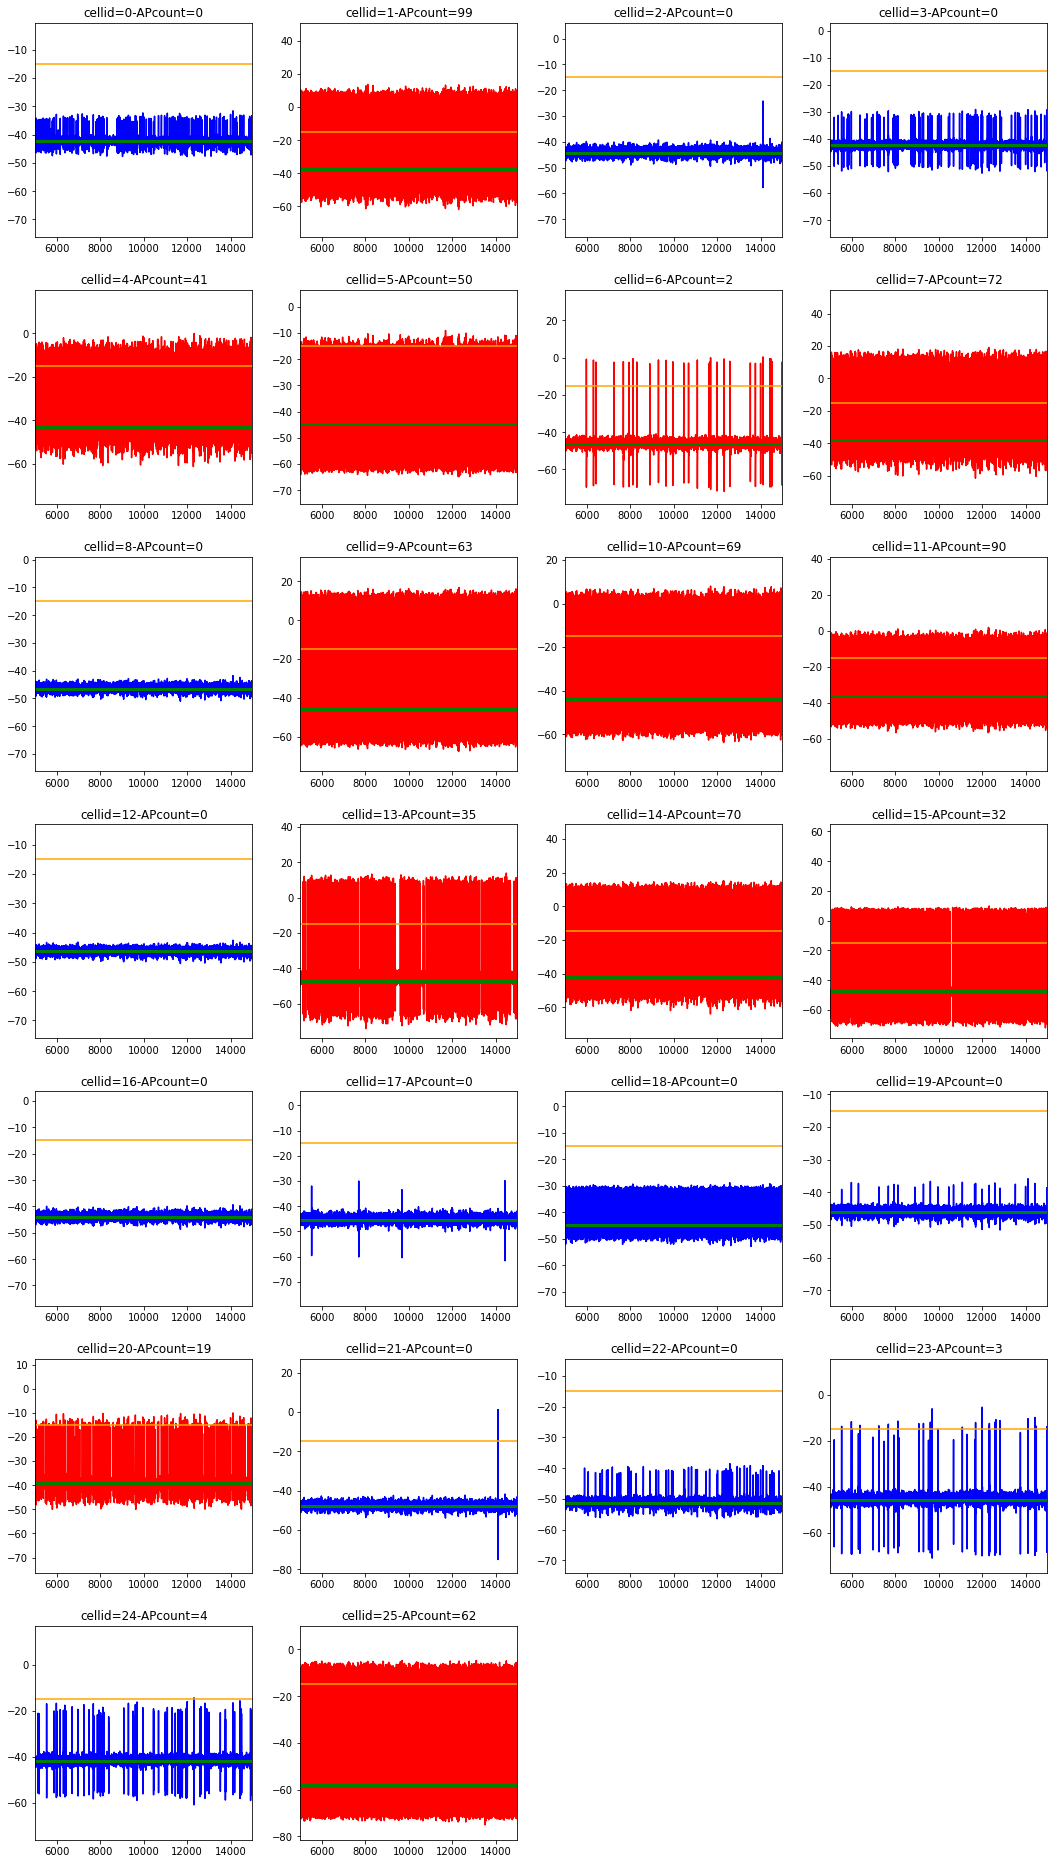

In [71]:
plot_traces(normal_keys, selection=[1, 4, 5, 6, 7, 9, 10, 11, 13, 14, 15, 20, 25])

## 6ohda models

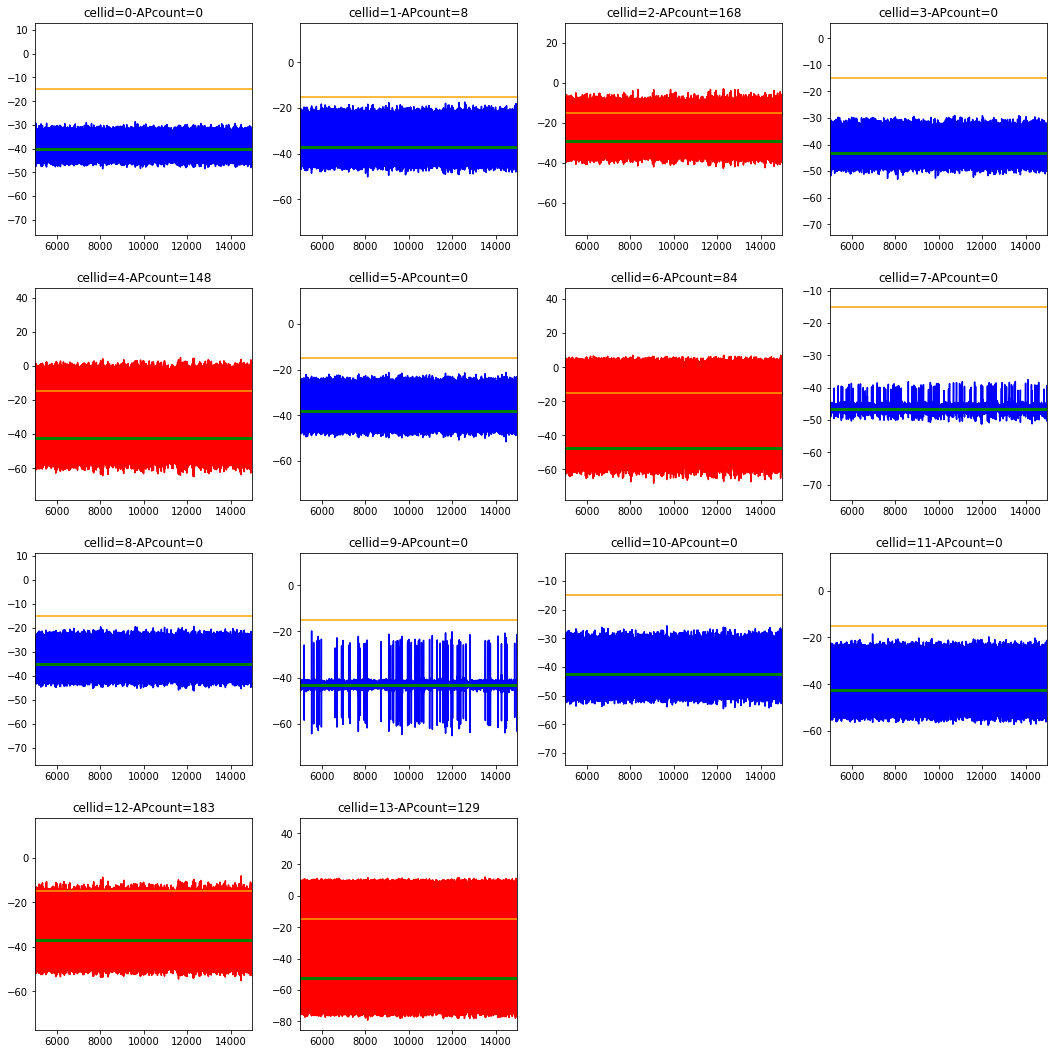

In [70]:
plot_traces(parkinsonian_keys, selection=[2, 4, 6, 12, 13])